In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv('toys_and_games_year_2022.csv')

# Step 1: Define date range and filter data
start_date = '11-01-2022'
end_date = '12-31-2022'
combined_df_2022['date'] = pd.to_datetime(combined_df_2022['date'])
filtered_df = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]



C:\Users\savav\AppData\Local\Temp\ipykernel_1960\1363042273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['week_start_date'] = filtered_df['date'] - pd.to_timedelta(filtered_df['date'].dt.weekday, unit='d')
C:\Users\savav\AppData\Local\Temp\ipykernel_1960\1363042273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['text'] = filtered_df['text'].astype(str).fillna('')


  0%|          | 0/463892 [00:00<?, ?it/s]

C:\Users\savav\AppData\Local\Temp\ipykernel_1960\1363042273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))
C:\Users\savav\AppData\Local\Temp\ipykernel_1960\1363042273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))


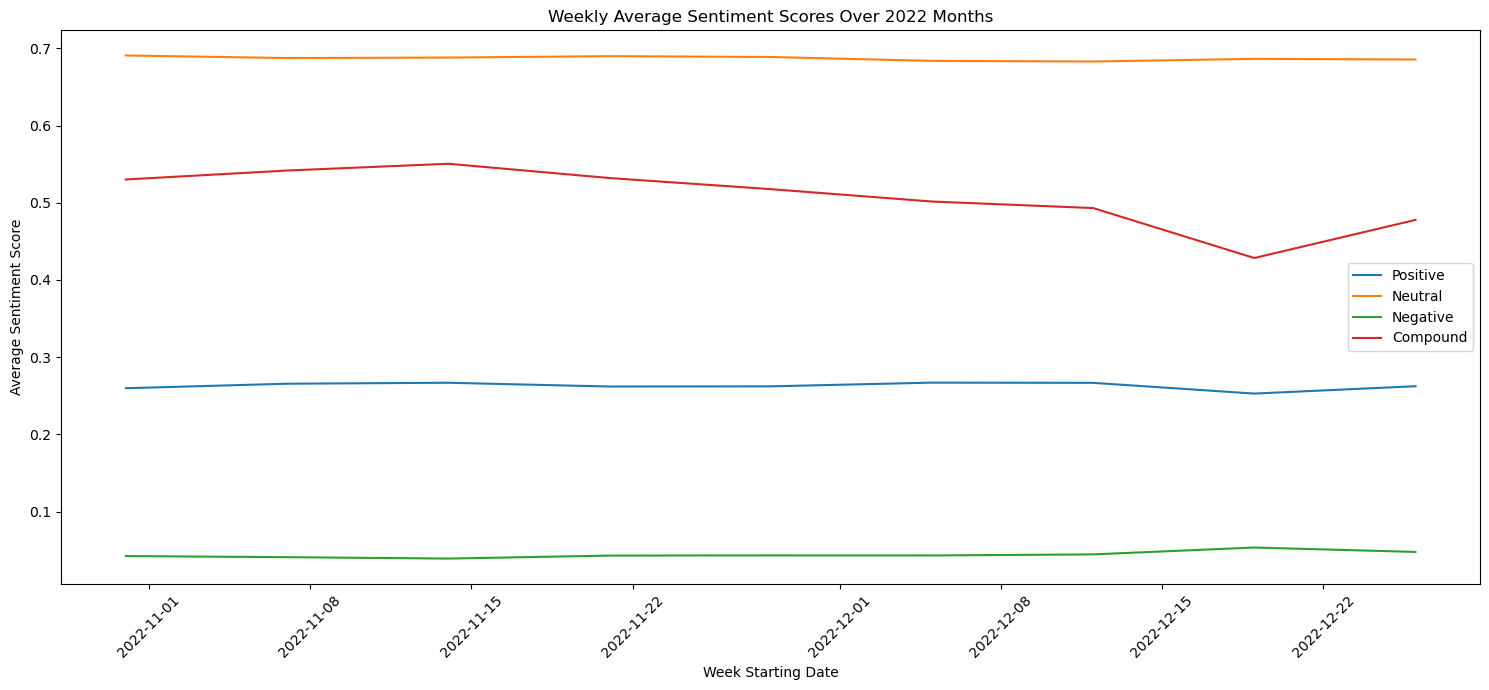

In [2]:
# Step 2: Create 'week_start_date' column
filtered_df['week_start_date'] = filtered_df['date'] - pd.to_timedelta(filtered_df['date'].dt.weekday, unit='d')

# Step 3: Compute sentiment scores
filtered_df['text'] = filtered_df['text'].astype(str).fillna('')
sentiment_analyzer = SentimentIntensityAnalyzer()
tqdm.pandas()
filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))

# Step 4: Aggregate sentiment scores week by week
weekly_sentiment = filtered_df.groupby('week_start_date').mean().reset_index()

# Step 5: Visualize the results
plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='pos', label='Positive')
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='neu', label='Neutral')
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='neg', label='Negative')
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='compound', label='Compound')
plt.title('Weekly Average Sentiment Scores Over 2022 Months')
plt.xlabel('Week Starting Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\savav\AppData\Local\Temp\ipykernel_14260\128912798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


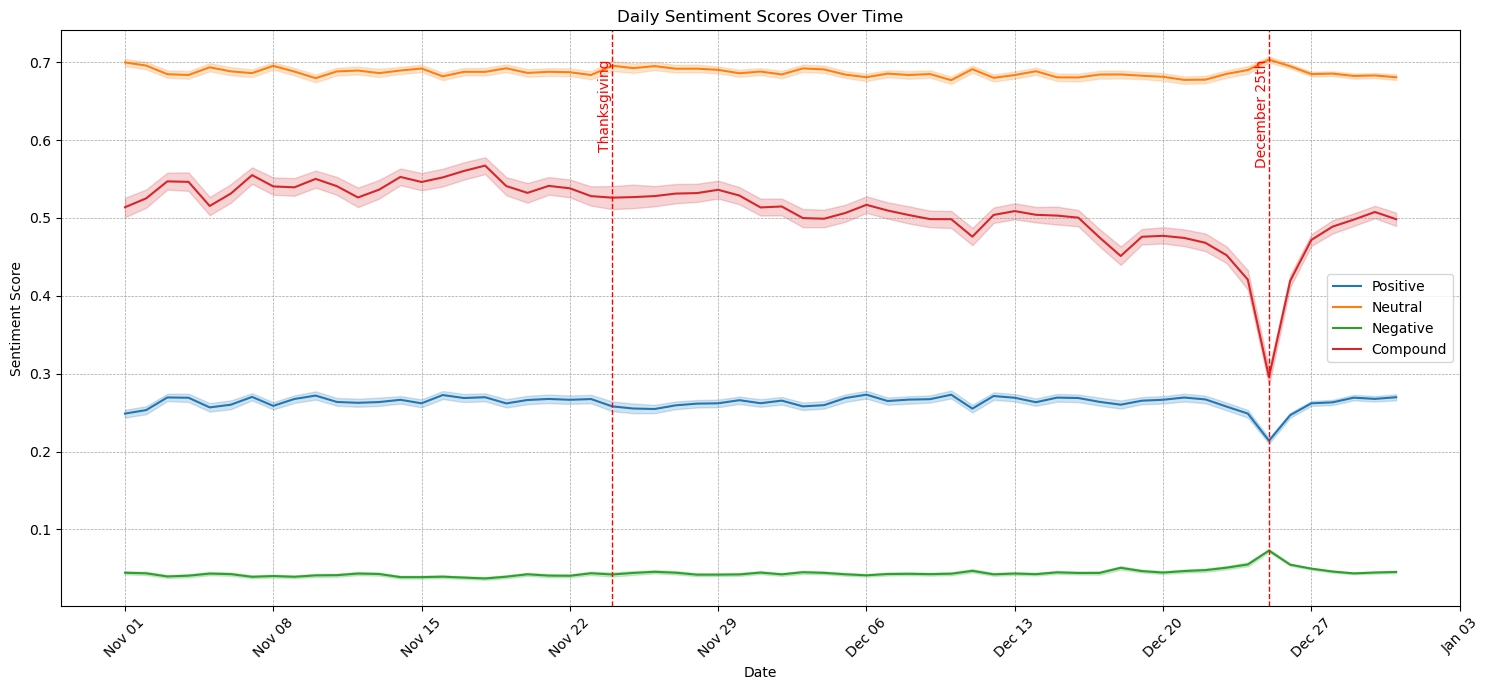

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure your 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Step 4: Visualize the results (now day-by-day)
plt.figure(figsize=(15, 7))

# Plot each sentiment score over the date column
sns.lineplot(data=filtered_df, x='date', y='pos', label='Positive')
sns.lineplot(data=filtered_df, x='date', y='neu', label='Neutral')
sns.lineplot(data=filtered_df, x='date', y='neg', label='Negative')
sns.lineplot(data=filtered_df, x='date', y='compound', label='Compound')

# Add light grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Highlight December 25th and Thanksgiving
# Define the dates
dec25 = pd.to_datetime('2022-12-25')
thanksgiving = pd.to_datetime('2022-11-24')  # Thanksgiving in 2022 was on November 24th

# Add vertical lines at the specified dates
plt.axvline(x=thanksgiving, color='red', linestyle='--', linewidth=1)
plt.axvline(x=dec25, color='red', linestyle='--', linewidth=1)

# Add annotations for the dates
plt.text(thanksgiving, plt.ylim()[1]*0.95, 'Thanksgiving', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(dec25, plt.ylim()[1]*0.95, 'December 25th', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')

# Format the x-axis to improve readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Daily Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
### Distribution of stars and vader compariosn

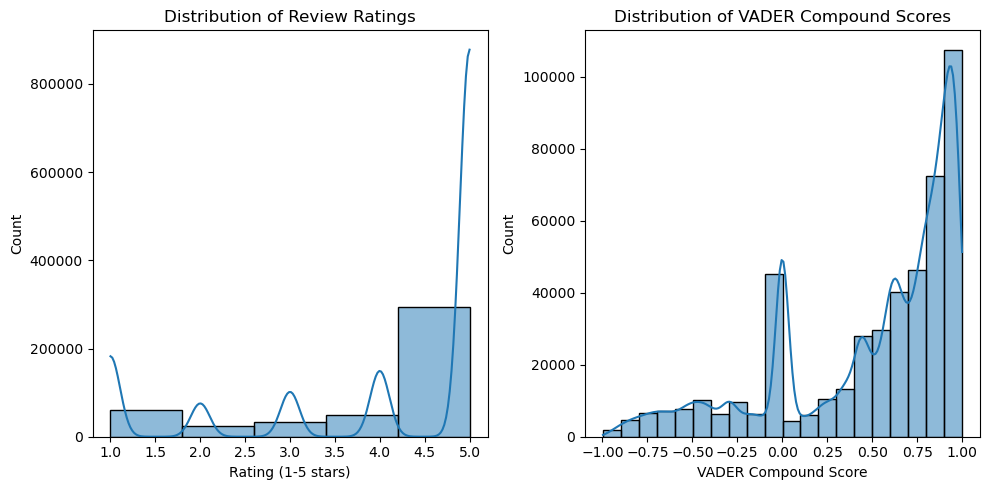

In [13]:
# Plot the distributions of review ratings and VADER compound score
plt.figure(figsize=(10, 5))

# Distribution of review ratings
plt.subplot(1, 2, 1)
sns.histplot(filtered_df['rating'], bins=5, kde=True)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (1-5 stars)')

# Distribution of VADER compound scores
plt.subplot(1, 2, 2)
sns.histplot(filtered_df['compound'], bins=20, kde=True)
plt.title('Distribution of VADER Compound Scores')
plt.xlabel('VADER Compound Score')

plt.tight_layout()
plt.show()

In [ ]:
### Classification for accuracy comparisons

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the target classes based on rating (1-5 stars)
def rating_to_class(rating):
    if rating <= 2:
        return 0  # Negative (Class 0)
    elif rating == 3:
        return 1  # Neutral (Class 1)
    else:
        return 2  # Positive (Class 2)

# Apply the classification function to the ratings
filtered_df['rating_class'] = filtered_df['rating'].apply(rating_to_class)

# Prepare the features (VADER compound score) and the target (rating class)
X = filtered_df[['compound']]  # Feature: VADER compound score
y = filtered_df['rating_class']  # Target: rating class (0, 1, 2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the rating classes on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy:.2f}')

# Print the classification report for detailed metrics
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


C:\Users\savav\AppData\Local\Temp\ipykernel_14260\3380317541.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rating_class'] = filtered_df['rating'].apply(rating_to_class)


Classification Accuracy: 0.81
              precision    recall  f1-score   support

    Negative       0.68      0.49      0.57     26042
     Neutral       0.00      0.00      0.00     10298
    Positive       0.83      0.97      0.89    102828

    accuracy                           0.81    139168
   macro avg       0.50      0.49      0.49    139168
weighted avg       0.74      0.81      0.77    139168



C:\Users\savav\anaconda-new\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savav\anaconda-new\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savav\anaconda-new\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
